In [ ]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import scipy.stats
import matplotlib.pyplot as plt
from datetime import datetime,timedelta
import yfinance as yf

In [97]:
end =datetime.today()
start = end - timedelta(days = 60)

In [98]:
stocks = ['NVDA','AAPL','NVO']
portfolio = pd.DataFrame()

In [99]:
for stock in stocks:
    stock = yf.download(stock,start,end)
    stock = stock['Adj Close']
    portfolio = pd.concat([portfolio,stock],axis=1)
    

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [213]:
portfolio.columns = stocks
portfolio

,NVDA,AAPL,NVO
2024-05-13 00:00:00,90.391579,186.279999,132.410004
2024-05-14 00:00:00,91.348495,187.429993,132.919998
2024-05-15 00:00:00,94.622223,189.720001,134.660004
2024-05-16 00:00:00,94.351250,189.839996,133.039993
2024-05-17 00:00:00,92.471397,189.869995,131.889999
2024-05-20 00:00:00,94.772217,191.039993,132.910004
2024-05-21 00:00:00,95.378166,192.350006,135.160004
2024-05-22 00:00:00,94.942200,190.899994,134.029999
2024-05-23 00:00:00,103.790482,186.880005,135.570007
2024-05-24 00:00:00,106.460258,189.979996,136.039993


In [100]:
portfolio_log_return = np.log(1+portfolio.pct_change())
portfolio_log_return = portfolio_log_return.dropna()


In [101]:
portfolio_cov = portfolio_log_return.cov()
portfolio_cov



,Adj Close,Adj Close,Adj Close
Adj Close,0.001007,-0.000019,0.000042
Adj Close,-0.000019,0.000266,-0.000010
Adj Close,0.000042,-0.000010,0.000202


In [102]:
assets = len(portfolio.columns)

In [103]:
def gen_weights(assets):
    
    weights = np.random.random(assets)
    weights = weights/sum(weights)
    
    return weights

In [162]:
def calc_returns(portfolio_log_return,weights):
    
    portfolio_cuml_ret = np.sum(portfolio_log_return.mean()*weights)*len(portfolio_log_return)
    
                        
    return portfolio_cuml_ret

In [222]:
def calc_vol(portfolio_cov,weights):
    
    lifetime_cov = np.dot(portfolio_cov*len(portfolio),weights)
    vol = np.dot(weights.transpose(),lifetime_cov)
    
    return np.sqrt(vol)

In [223]:
weights = gen_weights(len(portfolio.columns))
calc_vol(portfolio_cov,weights)

0.17300037223915196

In [239]:
mc_return = []
mc_weights = []
mc_vol = []
for sim in range(100000):
    weights = gen_weights(len(portfolio.columns))
    mc_weights.append(weights)
    returns = calc_returns(portfolio_log_return,weights)
    mc_return.append(returns)
    vol = calc_vol(portfolio_cov,weights)
    mc_vol.append(vol)
    

In [240]:
mc_sharpe = np.array(mc_return)/np.array(mc_vol)

In [241]:
mc_sharpe.max()

3.092861833359048

In [242]:
max(mc_return)

0.39986730737541176

In [243]:
mc_weights[9146]

array([0.14280389, 0.48408602, 0.37311009])

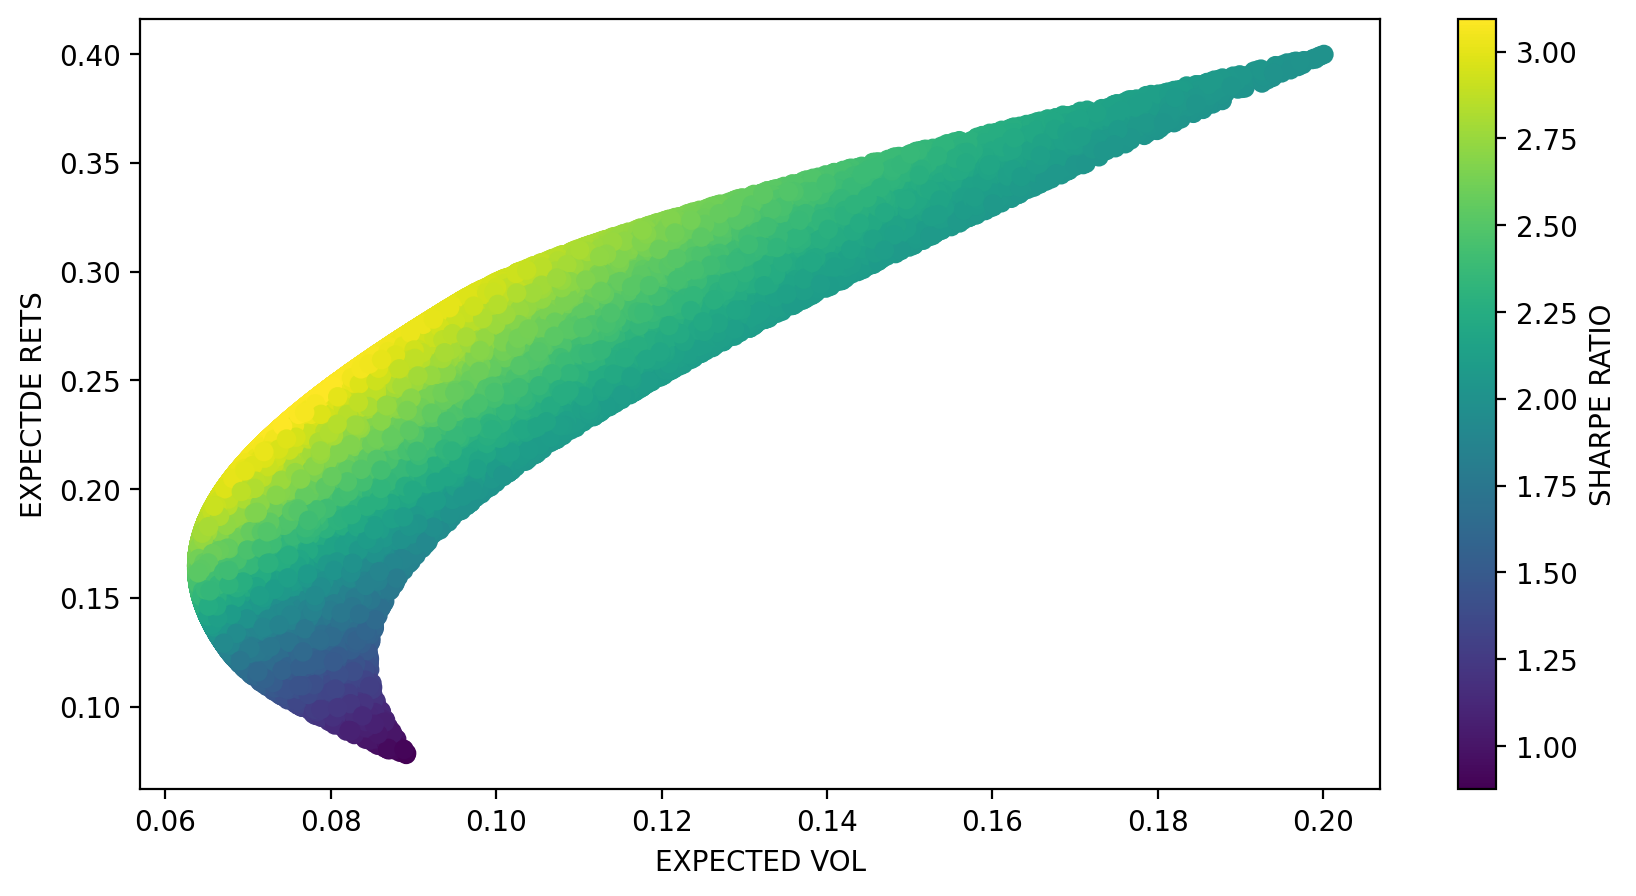

In [244]:
plt.figure(dpi=200,figsize=(10,5))
plt.scatter(mc_vol,mc_return,c=mc_sharpe)
plt.ylabel('EXPECTDE RETS')
plt.xlabel('EXPECTED VOL')
plt.colorbar(label="SHARPE RATIO");